In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Fake News vs True News Analysis**

Comparing the content, structure, and characteristics of real and fake news articles using data-driven methods.

### Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✓ Basic libraries imported successfully")

✓ Basic libraries imported successfully


### Text preprocessing libraries

In [ ]:
# NLP Libraries
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

print("✓ NLP libraries imported and NLTK data downloaded")

✓ NLP libraries imported and NLTK data downloaded


### Machine learning libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

print("✓ Machine learning libraries imported successfully")

✓ Machine learning libraries imported successfully


### Loading dataset

In [ ]:
true_df = pd.read_csv('/content/drive/MyDrive/dataset/True.csv')
fake_df = pd.read_csv('/content/drive/MyDrive/dataset/Fake.csv')
# Display basic info
print("True dataset shape:", true_df.shape)
print("Fake dataset shape:", fake_df.shape)

# Add labels
true_df['label'] = 1  # Label true news as 1
fake_df['label'] = 0  # Label fake news as 0

# Alternative labeling with text labels
true_df['label_text'] = 'TRUE'
fake_df['label_text'] = 'FAKE'

# Concatenate the datasets
combined_df = pd.concat([true_df, fake_df], ignore_index=True)

# Shuffle the combined dataset
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display results
print("\nCombined dataset shape:", combined_df.shape)
print("\nLabel distribution (numeric):")
print(combined_df['label'].value_counts())
print("\nLabel distribution (text):")
print(combined_df['label_text'].value_counts())


# Display dataset info
print("\nDataset columns:")
print(combined_df.columns.tolist())
print("\nDataset info:")
print(combined_df.info())


True dataset shape: (21417, 4)
Fake dataset shape: (23481, 4)

Combined dataset shape: (44898, 6)

Label distribution (numeric):
label
0    23481
1    21417
Name: count, dtype: int64

Label distribution (text):
label_text
FAKE    23481
TRUE    21417
Name: count, dtype: int64

Dataset columns:
['title', 'text', 'subject', 'date', 'label', 'label_text']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44898 non-null  object
 2   subject     44898 non-null  object
 3   date        44898 non-null  object
 4   label       44898 non-null  int64 
 5   label_text  44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB
None


In [ ]:
# Display first few rows
print("\nFirst 5 rows of combined dataset:")
combined_df[['title', 'subject', 'label', 'label_text']].head()


First 5 rows of combined dataset:


,title,subject,label,label_text
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,News,0,FAKE
1,Failed GOP Candidates Remembered In Hilarious...,News,0,FAKE
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,News,0,FAKE
3,California AG pledges to defend birth control ...,politicsNews,1,TRUE
4,AZ RANCHERS Living On US-Mexico Border Destroy...,politics,0,FAKE


In [ ]:
# Display dataset info
print("\nDataset columns:")
print(combined_df.columns.tolist())
print("\nDataset info:")
combined_df.info()



Dataset columns:
['title', 'text', 'subject', 'date', 'label', 'label_text']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44898 non-null  object
 2   subject     44898 non-null  object
 3   date        44898 non-null  object
 4   label       44898 non-null  int64 
 5   label_text  44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


### Exploratory Data Analysis

In [ ]:
print("=== EXPLORATORY DATA ANALYSIS ===")

# Check for missing values
print("\nMissing values:")
print(combined_df.isnull().sum())

# Check data types
print("\nData types:")
print(combined_df.dtypes)


# Check text lengths
combined_df['title_length'] = combined_df['title'].str.len()
combined_df['text_length'] = combined_df['text'].str.len()
combined_df['combined_length'] = combined_df['title_length'] + combined_df['text_length']

print(f"\nText length statistics:")
print(f"Average title length: {combined_df['title_length'].mean():.2f}")
print(f"Average text length: {combined_df['text_length'].mean():.2f}")

# Display sample data
print("\nSample data:")
combined_df[['title', 'text', 'subject', 'label']].head(3)


=== EXPLORATORY DATA ANALYSIS ===

Missing values:
title              0
text               0
subject            0
date               0
label              0
label_text         0
title_length       0
text_length        0
combined_length    0
dtype: int64

Data types:
title              object
text               object
subject            object
date               object
label               int64
label_text         object
title_length        int64
text_length         int64
combined_length     int64
dtype: object

Text length statistics:
Average title length: 80.11
Average text length: 2469.11

Sample data:


,title,text,subject,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,0
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,0
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,0


### DATA EXPLORATION VISUALIZATIONS

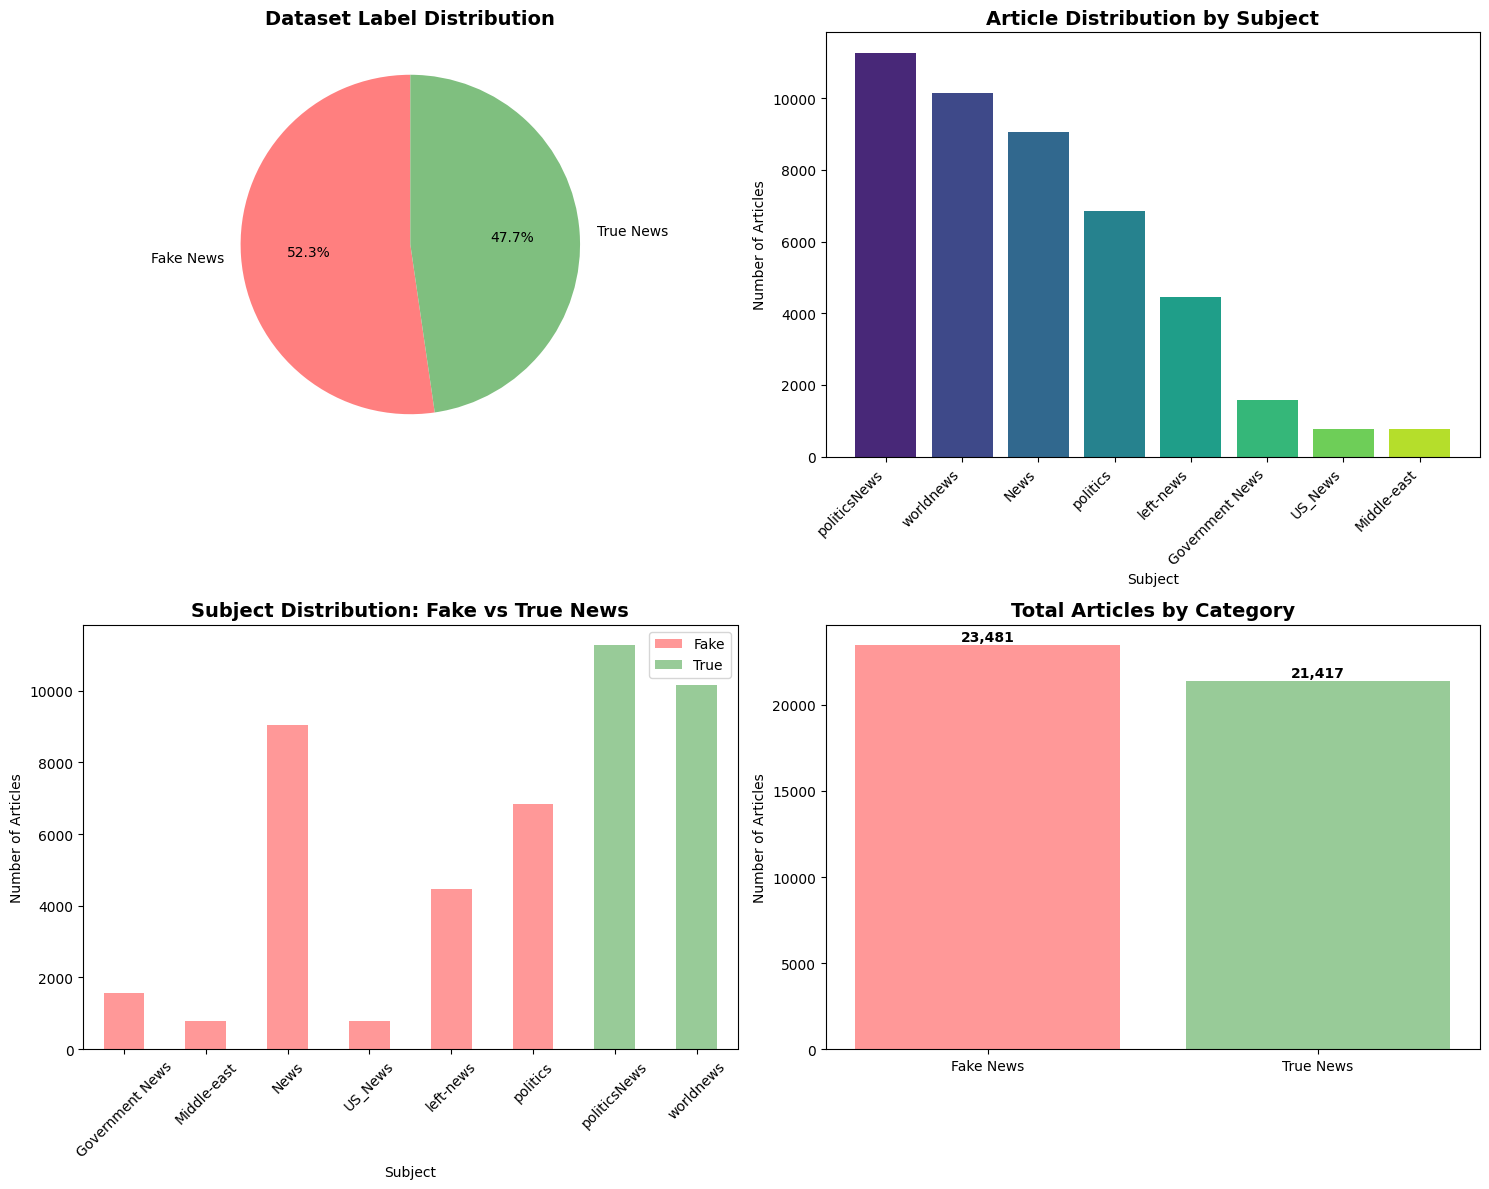

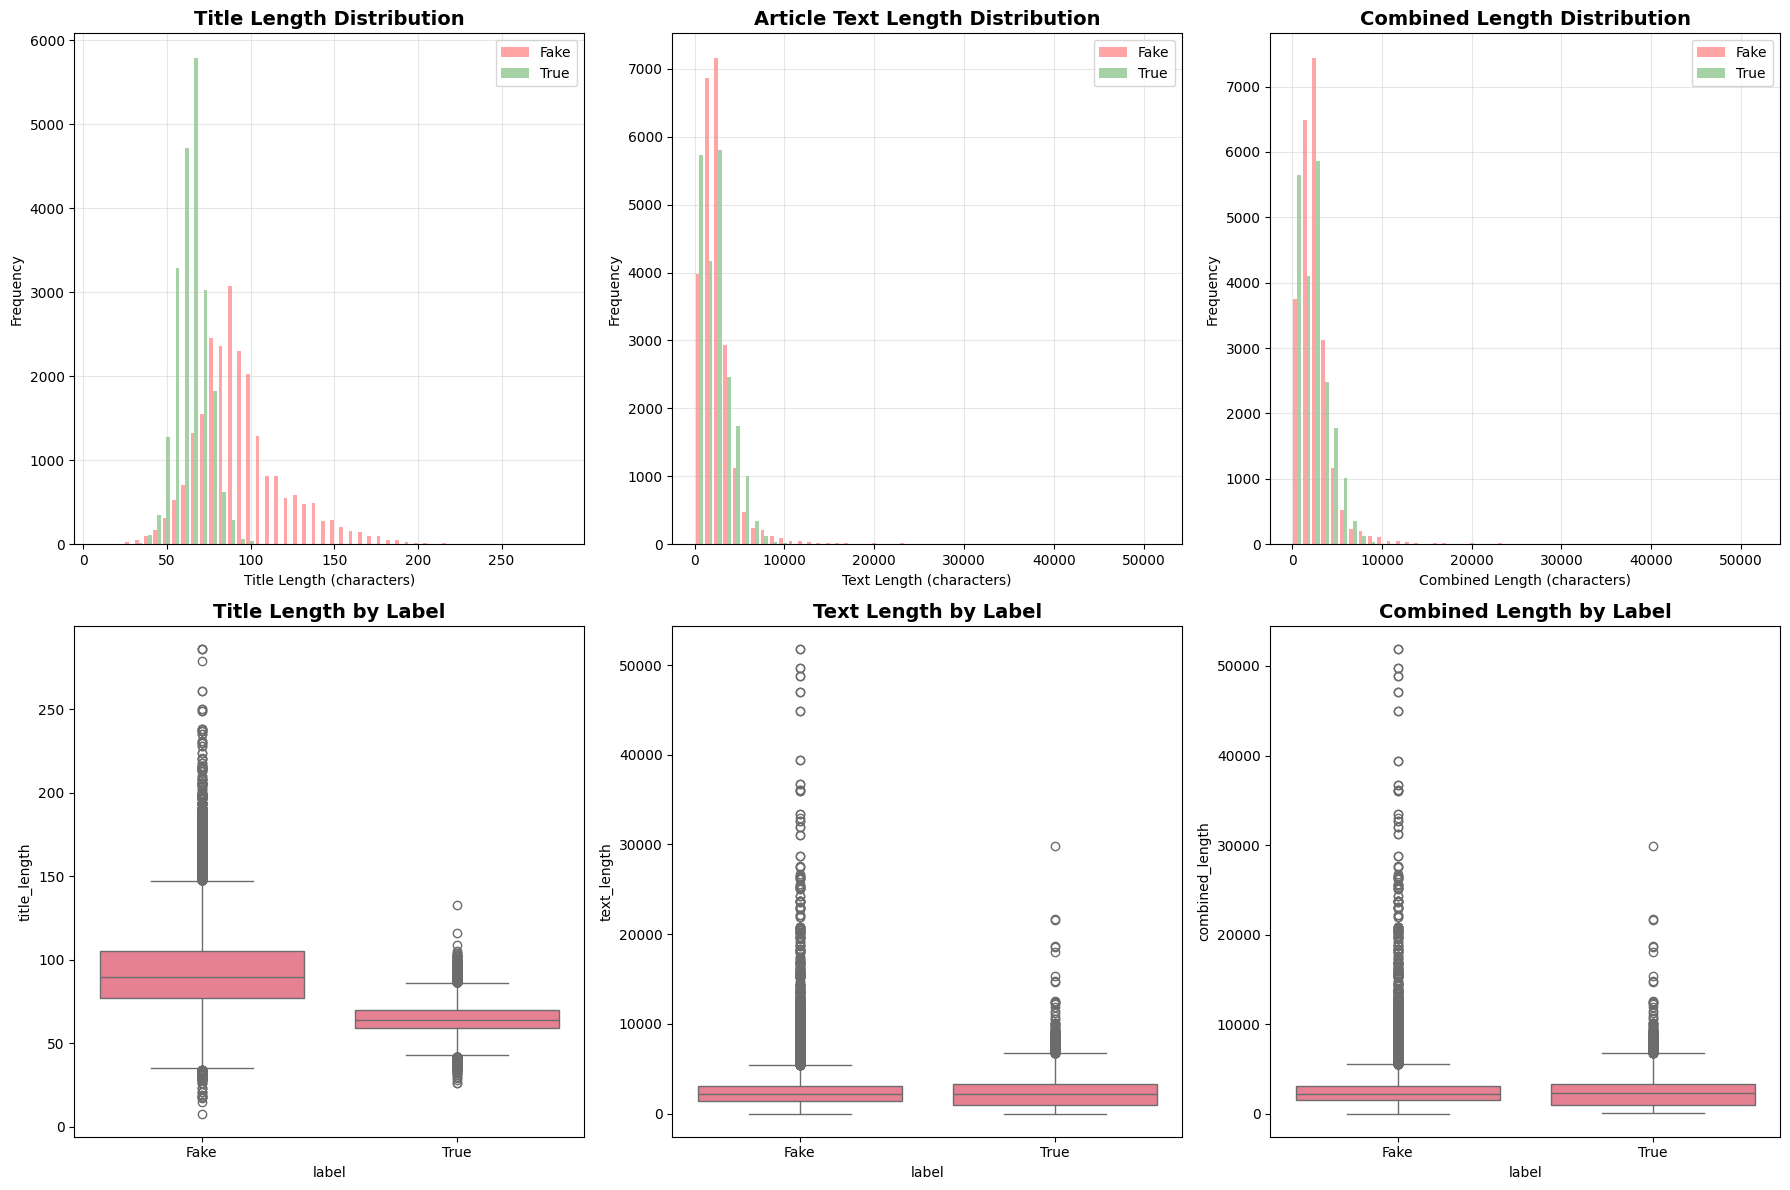


📊 STATISTICAL SUMMARY

Length Statistics by Label:
      title_length                                               text_length  \
             count   mean    std   min   25%   50%    75%    max       count   
label                                                                          
0          23481.0  94.20  27.18   8.0  77.0  90.0  105.0  286.0     23481.0   
1          21417.0  64.67   9.17  26.0  59.0  64.0   70.0  133.0     21417.0   

                ...                  combined_length                          \
          mean  ...     75%      max           count     mean      std   min   
label           ...                                                            
0      2547.40  ...  3032.0  51794.0         23481.0  2641.59  2533.72  30.0   
1      2383.28  ...  3237.0  29781.0         21417.0  2447.95  1684.41  31.0   

                                        
          25%     50%     75%      max  
label                                   
0      1529.0  2258.0  

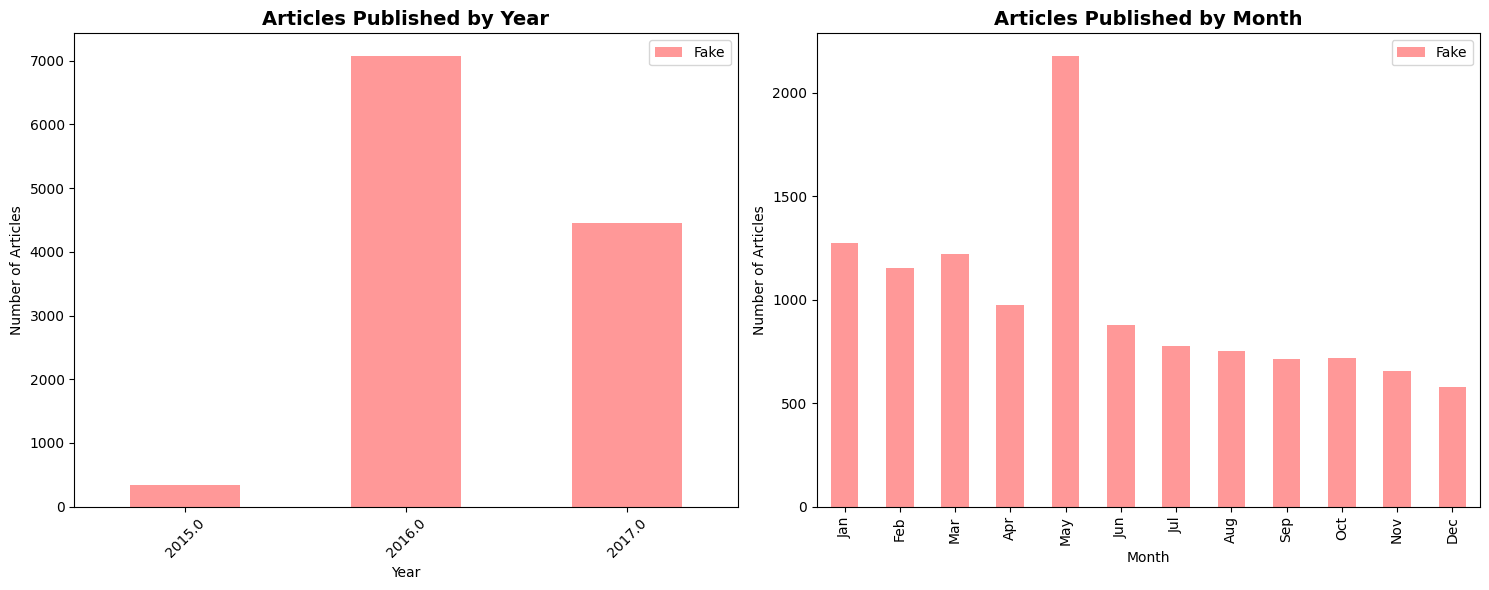

Date range: 2015-05-01 00:00:00 to 2017-12-31 00:00:00

📝 TEXT CONTENT PREVIEW:

--- FAKE NEWS EXAMPLE ---
Title:  BREAKING: GOP Chairman Grassley Has Had Enough, DEMANDS Trump Jr. Testimony...
Subject: News
Text: Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all of th...

--- TRUE NEWS EXAMPLE ---
Title: California AG pledges to defend birth control insurance coverage...
Subject: politicsNews
Text: SAN FRANCISCO (Reuters) - California Attorney General Xavier Becerra said on Friday he was “prepared to take whatever action it takes” to defend the Obamacare mandate that health insurers provide birt...

✅ Data exploration completed!
Ready to proceed with text preprocessing...


In [54]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. Dataset Overview
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Label distribution
label_counts = combined_df['label'].value_counts()
colors = ['#ff7f7f', '#7fbf7f']  # Red for fake, Green for true
axes[0,0].pie(label_counts.values, labels=['Fake News', 'True News'],
              autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,0].set_title('Dataset Label Distribution', fontsize=14, fontweight='bold')

# Subject distribution
subject_counts = combined_df['subject'].value_counts()
axes[0,1].bar(range(len(subject_counts)), subject_counts.values,
              color=sns.color_palette("viridis", len(subject_counts)))
axes[0,1].set_title('Article Distribution by Subject', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Subject')
axes[0,1].set_ylabel('Number of Articles')
axes[0,1].set_xticks(range(len(subject_counts)))
axes[0,1].set_xticklabels(subject_counts.index, rotation=45, ha='right')

# Subject distribution by label
subject_label = combined_df.groupby(['subject', 'label']).size().unstack(fill_value=0)
subject_label.plot(kind='bar', stacked=True, ax=axes[1,0],
                   color=['#ff7f7f', '#7fbf7f'], alpha=0.8)
axes[1,0].set_title('Subject Distribution: Fake vs True News', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Subject')
axes[1,0].set_ylabel('Number of Articles')
axes[1,0].legend(['Fake', 'True'])
axes[1,0].tick_params(axis='x', rotation=45)

# Article count by label
label_names = ['Fake News', 'True News']
label_values = [len(combined_df[combined_df['label']==0]), len(combined_df[combined_df['label']==1])]
bars = axes[1,1].bar(label_names, label_values, color=['#ff7f7f', '#7fbf7f'], alpha=0.8)
axes[1,1].set_title('Total Articles by Category', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Number of Articles')

# Add value labels on bars
for bar, value in zip(bars, label_values):
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                   f'{value:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Text Length Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Title length distribution
fake_title = combined_df[combined_df['label']==0]['title_length']
true_title = combined_df[combined_df['label']==1]['title_length']

axes[0,0].hist([fake_title, true_title], bins=50, alpha=0.7,
               label=['Fake', 'True'], color=['#ff7f7f', '#7fbf7f'])
axes[0,0].set_title('Title Length Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Title Length (characters)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Text length distribution
fake_text = combined_df[combined_df['label']==0]['text_length']
true_text = combined_df[combined_df['label']==1]['text_length']

axes[0,1].hist([fake_text, true_text], bins=50, alpha=0.7,
               label=['Fake', 'True'], color=['#ff7f7f', '#7fbf7f'])
axes[0,1].set_title('Article Text Length Distribution', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Text Length (characters)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Combined length distribution
fake_combined = combined_df[combined_df['label']==0]['combined_length']
true_combined = combined_df[combined_df['label']==1]['combined_length']

axes[0,2].hist([fake_combined, true_combined], bins=50, alpha=0.7,
               label=['Fake', 'True'], color=['#ff7f7f', '#7fbf7f'])
axes[0,2].set_title('Combined Length Distribution', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Combined Length (characters)')
axes[0,2].set_ylabel('Frequency')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Box plots for better comparison
sns.boxplot(data=combined_df, x='label', y='title_length', ax=axes[1,0])
axes[1,0].set_title('Title Length by Label', fontsize=14, fontweight='bold')
axes[1,0].set_xticklabels(['Fake', 'True'])

sns.boxplot(data=combined_df, x='label', y='text_length', ax=axes[1,1])
axes[1,1].set_title('Text Length by Label', fontsize=14, fontweight='bold')
axes[1,1].set_xticklabels(['Fake', 'True'])

sns.boxplot(data=combined_df, x='label', y='combined_length', ax=axes[1,2])
axes[1,2].set_title('Combined Length by Label', fontsize=14, fontweight='bold')
axes[1,2].set_xticklabels(['Fake', 'True'])

plt.tight_layout()
plt.show()

# 3. Statistical Summary
print("\n" + "="*60)
print("📊 STATISTICAL SUMMARY")
print("="*60)

# Length statistics by label
length_stats = combined_df.groupby('label')[['title_length', 'text_length', 'combined_length']].describe()
print("\nLength Statistics by Label:")
print(length_stats.round(2))

# Subject statistics
print(f"\n📈 Subject Analysis:")
print(f"Total unique subjects: {combined_df['subject'].nunique()}")
print(f"Most common subject: {combined_df['subject'].mode().iloc[0]}")

subject_fake_pct = combined_df.groupby('subject')['label'].apply(lambda x: (x==0).mean() * 100).sort_values(ascending=False)
print(f"\nSubjects with highest fake news percentage:")
for subject, pct in subject_fake_pct.head().items():
    print(f"  {subject}: {pct:.1f}% fake")

# 4. Time-based Analysis (if date column exists)
if 'date' in combined_df.columns:
    print(f"\n📅 Date Analysis:")

    # Try to parse dates
    try:
        combined_df['date_parsed'] = pd.to_datetime(combined_df['date'], errors='coerce')
        combined_df['year'] = combined_df['date_parsed'].dt.year
        combined_df['month'] = combined_df['date_parsed'].dt.month

        # Plot publication trends
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # Publications by year
        year_data = combined_df.groupby(['year', 'label']).size().unstack(fill_value=0)
        if not year_data.empty:
            year_data.plot(kind='bar', ax=axes[0], color=['#ff7f7f', '#7fbf7f'], alpha=0.8)
            axes[0].set_title('Articles Published by Year', fontsize=14, fontweight='bold')
            axes[0].set_xlabel('Year')
            axes[0].set_ylabel('Number of Articles')
            axes[0].legend(['Fake', 'True'])
            axes[0].tick_params(axis='x', rotation=45)

        # Publications by month
        month_data = combined_df.groupby(['month', 'label']).size().unstack(fill_value=0)
        if not month_data.empty:
            month_data.plot(kind='bar', ax=axes[1], color=['#ff7f7f', '#7fbf7f'], alpha=0.8)
            axes[1].set_title('Articles Published by Month', fontsize=14, fontweight='bold')
            axes[1].set_xlabel('Month')
            axes[1].set_ylabel('Number of Articles')
            axes[1].legend(['Fake', 'True'])
            axes[1].set_xticks(range(12))
            axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

        plt.tight_layout()
        plt.show()

        print(f"Date range: {combined_df['date_parsed'].min()} to {combined_df['date_parsed'].max()}")

    except Exception as e:
        print(f"Could not parse dates: {e}")

# 5. Text Content Preview
print(f"\n📝 TEXT CONTENT PREVIEW:")
print(f"\n--- FAKE NEWS EXAMPLE ---")
fake_example = combined_df[combined_df['label']==0].iloc[0]
print(f"Title: {fake_example['title'][:100]}...")
print(f"Subject: {fake_example['subject']}")
print(f"Text: {fake_example['text'][:200]}...")

print(f"\n--- TRUE NEWS EXAMPLE ---")
true_example = combined_df[combined_df['label']==1].iloc[0]
print(f"Title: {true_example['title'][:100]}...")
print(f"Subject: {true_example['subject']}")
print(f"Text: {true_example['text'][:200]}...")

print(f"\n✅ Data exploration completed!")
print(f"Ready to proceed with text preprocessing...")


### Text Preprocessing Functions

In [ ]:

def clean_text(text):
    """
    Comprehensive text cleaning function
    """
    if pd.isna(text):
        return ""

    # Convert to string and lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

def advanced_text_preprocessing(text):
    """
    Advanced preprocessing with stemming and stopword removal
    """
    # Initialize tools
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Clean text
    text = clean_text(text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and apply stemming
    processed_tokens = [
        stemmer.stem(token) for token in tokens
        if token not in stop_words and len(token) > 2
    ]

    return ' '.join(processed_tokens)

print("✅ Text preprocessing functions defined!")



✅ Text preprocessing functions defined!


In [ ]:
# Run this to fix NLTK
import nltk

# Download ALL required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

print("✅ NLTK data downloaded!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


✅ NLTK data downloaded!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Apply Text Preprocessing

In [ ]:
print("Applying text preprocessing...")

# Create combined text column
combined_df['combined_text'] = combined_df['title'].fillna('') + ' ' + combined_df['text'].fillna('')

# Apply cleaning
print("Step 1: Basic text cleaning...")
combined_df['text_cleaned'] = combined_df['combined_text'].apply(clean_text)

# Apply advanced preprocessing
print("Step 2: Advanced preprocessing (stemming, stopword removal)...")
combined_df['text_processed'] = combined_df['combined_text'].apply(advanced_text_preprocessing)

# Show preprocessing results
print("\n=== PREPROCESSING RESULTS ===")
print("Original text sample:")
print(combined_df['combined_text'].iloc[0][:200] + "...")
print("\nCleaned text sample:")
print(combined_df['text_cleaned'].iloc[0][:200] + "...")
print("\nProcessed text sample:")
print(combined_df['text_processed'].iloc[0][:200] + "...")

print("✅ Text preprocessing completed!")


Applying text preprocessing...
Step 1: Basic text cleaning...
Step 2: Advanced preprocessing (stemming, stopword removal)...

=== PREPROCESSING RESULTS ===
Original text sample:
 BREAKING: GOP Chairman Grassley Has Had Enough, DEMANDS Trump Jr. Testimony Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour,...

Cleaned text sample:
breaking gop chairman grassley has had enough demands trump jr testimony donald trump s white house is in chaos and they are trying to cover it up their russia problems are mounting by the hour and th...

Processed text sample:
break gop chairman grassley enough demand trump testimoni donald trump white hous chao tri cover russia problem mount hour refus acknowledg problem surround fake news hoax howev fact bear thing differ...
✅ Text preprocessing completed!


### Feature Engineering with TF-IDF

In [ ]:
print("Creating TF-IDF features...")

# Initialize different vectorizers
vectorizers = {
    'tfidf_basic': TfidfVectorizer(
        max_features=5000,
        stop_words='english',
        ngram_range=(1, 1),
        min_df=2,
        max_df=0.95
    ),
    'tfidf_bigram': TfidfVectorizer(
        max_features=5000,
        stop_words='english',
        ngram_range=(1, 2),
        min_df=2,
        max_df=0.95
    ),
    'count_vectorizer': CountVectorizer(
        max_features=5000,
        stop_words='english',
        ngram_range=(1, 1),
        min_df=2,
        max_df=0.95
    )
}

# Apply vectorization on processed text
features = {}
for name, vectorizer in vectorizers.items():
    print(f"Creating {name} features...")
    features[name] = vectorizer.fit_transform(combined_df['text_processed'])
    print(f"  Shape: {features[name].shape}")

print("✅ Feature engineering completed!")

Creating TF-IDF features...
Creating tfidf_basic features...
  Shape: (44898, 5000)
Creating tfidf_bigram features...
  Shape: (44898, 5000)
Creating count_vectorizer features...
  Shape: (44898, 5000)
✅ Feature engineering completed!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

print("✅ train_test_split imported!")

✅ train_test_split imported!


### Train-Test-Validation Split

In [ ]:
print("Splitting data into train, validation, and test sets...")

# Prepare target variable
y = combined_df['label'].values

# Split data for each feature set
splits = {}
for name, X in features.items():
    print(f"\nSplitting {name} features...")

    # First split: 70% train, 30% temp (val+test)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.30, random_state=42, stratify=y
    )

    # Second split: 50% validation, 50% test (of the 30%)
    # This gives us 70% train, 15% val, 15% test overall
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
    )

    splits[name] = {
        'X_train': X_train,
        'X_val': X_val,
        'X_test': X_test,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test
    }

    print(f"{name} split results:")
    print(f"  Training set: {X_train.shape} ({len(y_train)/len(y)*100:.1f}%)")
    print(f"  Validation set: {X_val.shape} ({len(y_val)/len(y)*100:.1f}%)")
    print(f"  Test set: {X_test.shape} ({len(y_test)/len(y)*100:.1f}%)")
    print(f"  Train label distribution: {np.bincount(y_train)} (Fake: {np.bincount(y_train)[0]}, True: {np.bincount(y_train)[1]})")
    print(f"  Validation label distribution: {np.bincount(y_val)} (Fake: {np.bincount(y_val)[0]}, True: {np.bincount(y_val)[1]})")
    print(f"  Test label distribution: {np.bincount(y_test)} (Fake: {np.bincount(y_test)[0]}, True: {np.bincount(y_test)[1]})")

print("\n✅ Data splitting completed!")
print("Split ratios: 70% Train, 15% Validation, 15% Test")

Splitting data into train, validation, and test sets...

Splitting tfidf_basic features...
tfidf_basic split results:
  Training set: (31428, 5000) (70.0%)
  Validation set: (6735, 5000) (15.0%)
  Test set: (6735, 5000) (15.0%)
  Train label distribution: [16436 14992] (Fake: 16436, True: 14992)
  Validation label distribution: [3522 3213] (Fake: 3522, True: 3213)
  Test label distribution: [3523 3212] (Fake: 3523, True: 3212)

Splitting tfidf_bigram features...
tfidf_bigram split results:
  Training set: (31428, 5000) (70.0%)
  Validation set: (6735, 5000) (15.0%)
  Test set: (6735, 5000) (15.0%)
  Train label distribution: [16436 14992] (Fake: 16436, True: 14992)
  Validation label distribution: [3522 3213] (Fake: 3522, True: 3213)
  Test label distribution: [3523 3212] (Fake: 3523, True: 3212)

Splitting count_vectorizer features...
count_vectorizer split results:
  Training set: (31428, 5000) (70.0%)
  Validation set: (6735, 5000) (15.0%)
  Test set: (6735, 5000) (15.0%)
  Train la

### Define Models

In [ ]:
# Define models to evaluate
models = {
    'Logistic_Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive_Bayes': MultinomialNB(),
    'Random_Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42, probability=True)
}

print("✅ Models defined:")
for name in models.keys():
    print(f"  - {name}")

✅ Models defined:
  - Logistic_Regression
  - Naive_Bayes
  - Random_Forest
  - SVM


In [ ]:
from sklearn.metrics import roc_auc_score

### Model Training and Evaluation (With Validation)

In [ ]:
def evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test, model_name):
    """
    Train and evaluate a model with validation set
    """
    print(f"\n=== Evaluating {model_name} ===")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on validation and test sets
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Get probabilities if available
    y_val_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else None
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Classification report for test set
    print("Test Set Classification Report:")
    print(classification_report(y_test, y_test_pred, target_names=['Fake', 'True']))

    # ROC AUC if probability predictions available
    val_roc_auc = roc_auc_score(y_val, y_val_proba) if y_val_proba is not None else None
    test_roc_auc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None

    if val_roc_auc is not None:
        print(f"Validation ROC AUC: {val_roc_auc:.4f}")
        print(f"Test ROC AUC: {test_roc_auc:.4f}")

    return {
        'model': model,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'val_roc_auc': val_roc_auc,
        'test_roc_auc': test_roc_auc,
        'val_predictions': y_val_pred,
        'test_predictions': y_test_pred,
        'val_probabilities': y_val_proba,
        'test_probabilities': y_test_proba
    }

# Store all results
all_results = {}

# Evaluate all combinations of models and features
for feature_name, split_data in splits.items():
    print(f"\n{'='*50}")
    print(f"FEATURE SET: {feature_name.upper()}")
    print(f"{'='*50}")

    all_results[feature_name] = {}

    for model_name, model in models.items():
        result = evaluate_model(
            model,
            split_data['X_train'],
            split_data['X_val'],
            split_data['X_test'],
            split_data['y_train'],
            split_data['y_val'],
            split_data['y_test'],
            model_name
        )
        all_results[feature_name][model_name] = result

print("✅ Model evaluation completed!")


FEATURE SET: TFIDF_BASIC

=== Evaluating Logistic_Regression ===
Validation Accuracy: 0.9831
Test Accuracy: 0.9878
Test Set Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      3523
        True       0.98      0.99      0.99      3212

    accuracy                           0.99      6735
   macro avg       0.99      0.99      0.99      6735
weighted avg       0.99      0.99      0.99      6735

Validation ROC AUC: 0.9983
Test ROC AUC: 0.9990

=== Evaluating Naive_Bayes ===
Validation Accuracy: 0.9238
Test Accuracy: 0.9255
Test Set Classification Report:
              precision    recall  f1-score   support

        Fake       0.92      0.93      0.93      3523
        True       0.93      0.92      0.92      3212

    accuracy                           0.93      6735
   macro avg       0.93      0.93      0.93      6735
weighted avg       0.93      0.93      0.93      6735

Validation ROC AUC: 0.9769
Test ROC 

### Results Comparison and Visualization

In [44]:
# Create results summary
results_summary = []

for feature_name, models_results in all_results.items():
    for model_name, result in models_results.items():
        results_summary.append({
            'Feature_Set': feature_name,
            'Model': model_name,
            'Validation_Accuracy': result['val_accuracy'],
            'Test_Accuracy': result['test_accuracy'],
            'Validation_ROC_AUC': result['val_roc_auc'] if result['val_roc_auc'] else 0,
            'Test_ROC_AUC': result['test_roc_auc'] if result['test_roc_auc'] else 0
        })

results_df = pd.DataFrame(results_summary)

print("=== RESULTS SUMMARY ===")
print(results_df.to_string(index=False))

# Find best model based on validation accuracy (for model selection)
best_val_result = results_df.loc[results_df['Validation_Accuracy'].idxmax()]
print(f"\n🏆 BEST MODEL (Based on Validation):")
print(f"Feature Set: {best_val_result['Feature_Set']}")
print(f"Model: {best_val_result['Model']}")
print(f"Validation Accuracy: {best_val_result['Validation_Accuracy']:.4f}")
print(f"Test Accuracy: {best_val_result['Test_Accuracy']:.4f}")
print(f"Validation ROC AUC: {best_val_result['Validation_ROC_AUC']:.4f}")
print(f"Test ROC AUC: {best_val_result['Test_ROC_AUC']:.4f}")

# Also show best test accuracy (for comparison)
best_test_result = results_df.loc[results_df['Test_Accuracy'].idxmax()]
print(f"\n📊 HIGHEST TEST ACCURACY:")
print(f"Feature Set: {best_test_result['Feature_Set']}")
print(f"Model: {best_test_result['Model']}")
print(f"Test Accuracy: {best_test_result['Test_Accuracy']:.4f}")

# Check for overfitting
print(f"\n🔍 OVERFITTING CHECK:")
results_df['Accuracy_Diff'] = results_df['Validation_Accuracy'] - results_df['Test_Accuracy']
print("Validation - Test Accuracy (negative means overfitting):")
for _, row in results_df.iterrows():
    diff = row['Accuracy_Diff']
    status = "✅ Good" if abs(diff) < 0.02 else "⚠️ Check" if abs(diff) < 0.05 else "❌ Overfitting"
    print(f"  {row['Model']} ({row['Feature_Set']}): {diff:+.4f} {status}")

print(f"\n✅ Results analysis completed!")

=== RESULTS SUMMARY ===
     Feature_Set               Model  Validation_Accuracy  Test_Accuracy  Validation_ROC_AUC  Test_ROC_AUC
     tfidf_basic Logistic_Regression             0.983073       0.987825            0.998253      0.998999
     tfidf_basic         Naive_Bayes             0.923831       0.925464            0.976900      0.976312
     tfidf_basic       Random_Forest             0.996437       0.997030            0.999751      0.999821
     tfidf_basic                 SVM             0.991537       0.993912            0.999373      0.999649
    tfidf_bigram Logistic_Regression             0.984855       0.989161            0.998815      0.999183
    tfidf_bigram         Naive_Bayes             0.936600       0.938827            0.983587      0.983365
    tfidf_bigram       Random_Forest             0.996882       0.997773            0.999791      0.999812
    tfidf_bigram                 SVM             0.992873       0.994358            0.999714      0.999646
count_vectori

### Visualize Results

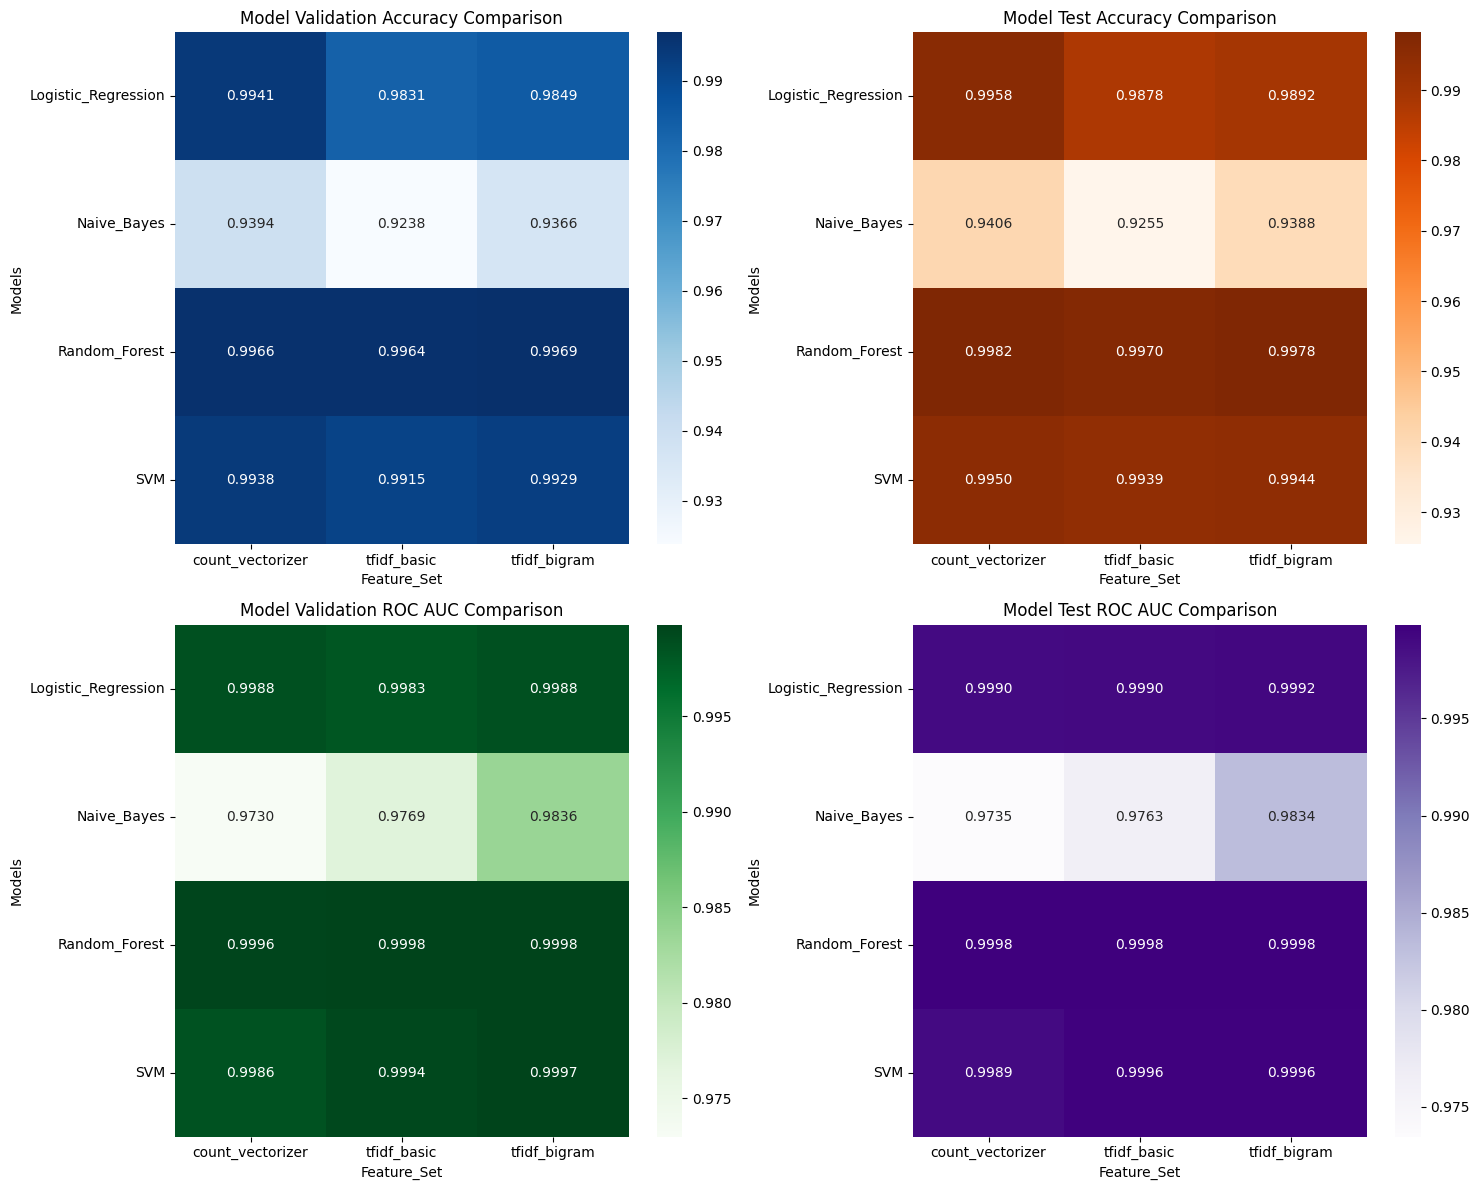

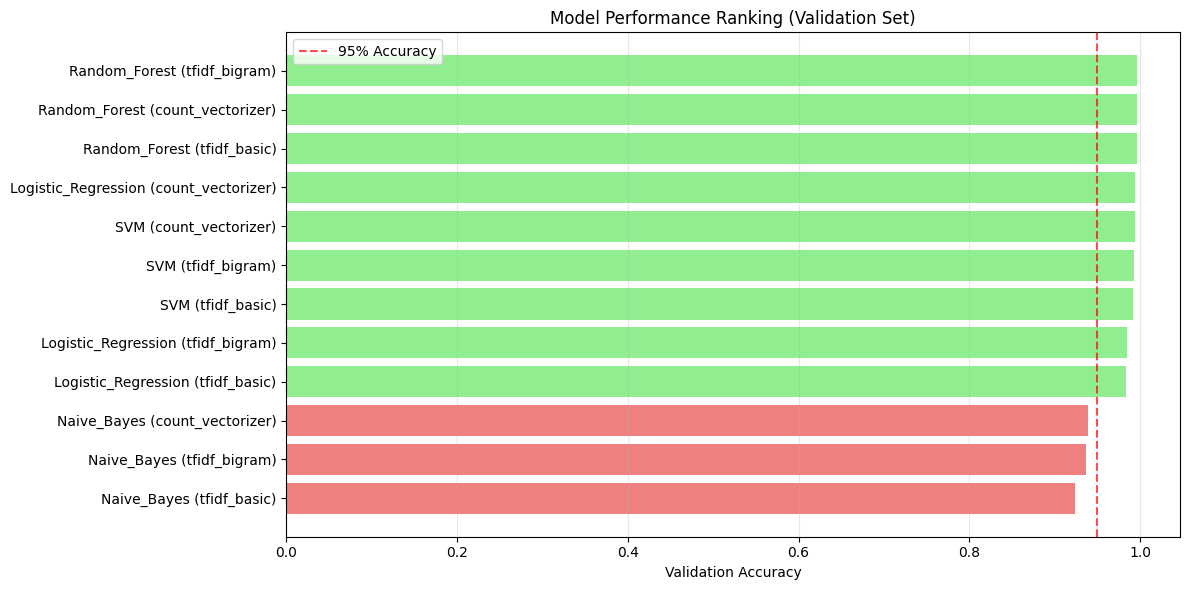

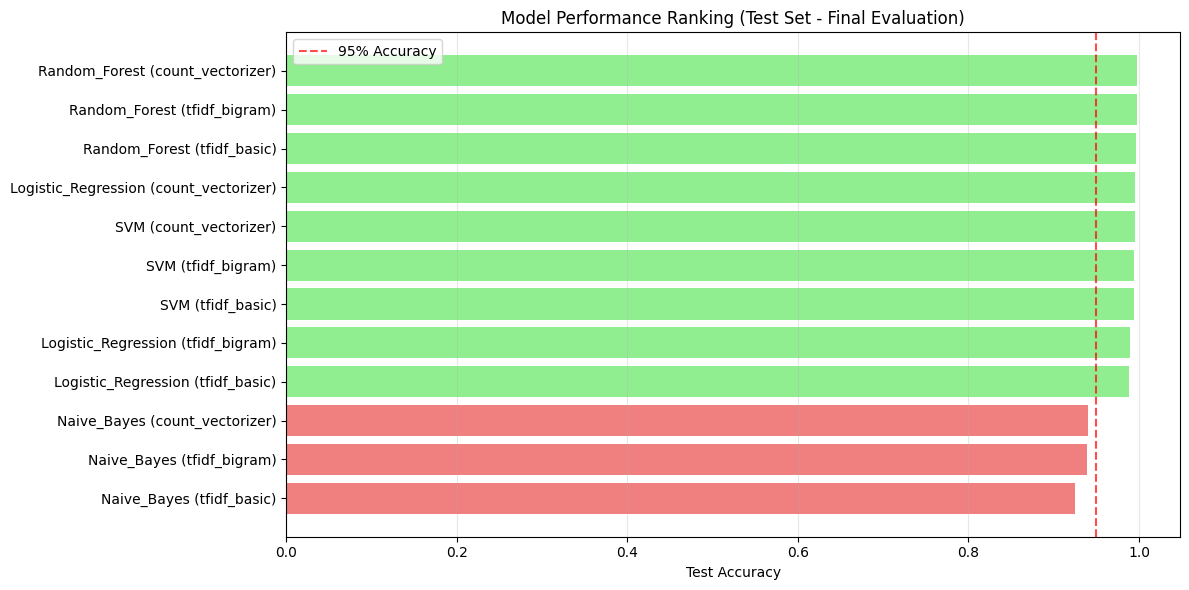

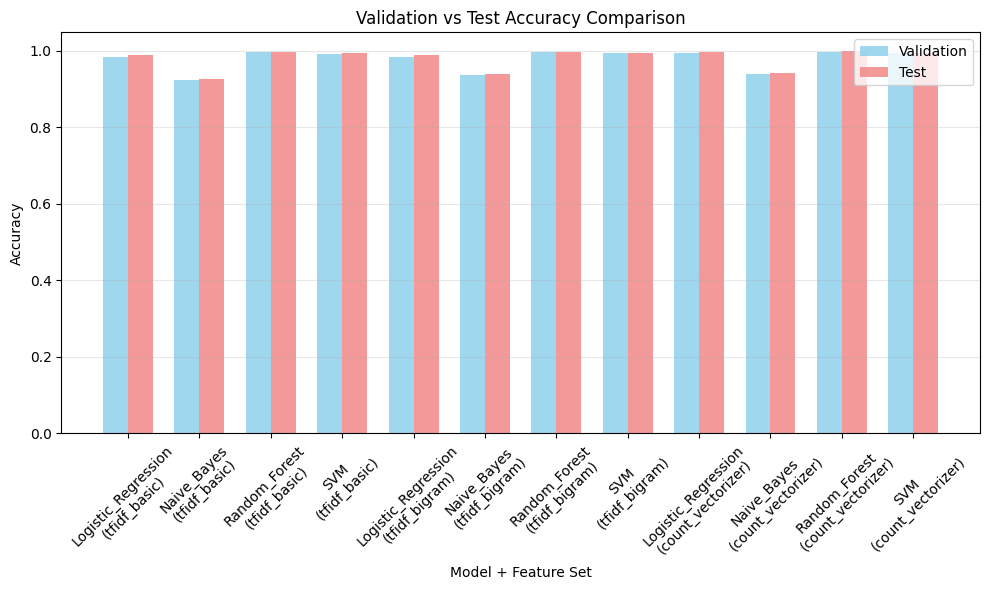

✅ All visualizations completed!


In [47]:
# Create visualization of results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Validation Accuracy comparison
pivot_val_acc = results_df.pivot(index='Model', columns='Feature_Set', values='Validation_Accuracy')
sns.heatmap(pivot_val_acc, annot=True, fmt='.4f', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Model Validation Accuracy Comparison')
axes[0,0].set_ylabel('Models')

# Test Accuracy comparison
pivot_test_acc = results_df.pivot(index='Model', columns='Feature_Set', values='Test_Accuracy')
sns.heatmap(pivot_test_acc, annot=True, fmt='.4f', cmap='Oranges', ax=axes[0,1])
axes[0,1].set_title('Model Test Accuracy Comparison')
axes[0,1].set_ylabel('Models')

# Validation ROC AUC comparison
pivot_val_auc = results_df.pivot(index='Model', columns='Feature_Set', values='Validation_ROC_AUC')
sns.heatmap(pivot_val_auc, annot=True, fmt='.4f', cmap='Greens', ax=axes[1,0])
axes[1,0].set_title('Model Validation ROC AUC Comparison')
axes[1,0].set_ylabel('Models')

# Test ROC AUC comparison
pivot_test_auc = results_df.pivot(index='Model', columns='Feature_Set', values='Test_ROC_AUC')
sns.heatmap(pivot_test_auc, annot=True, fmt='.4f', cmap='Purples', ax=axes[1,1])
axes[1,1].set_title('Model Test ROC AUC Comparison')
axes[1,1].set_ylabel('Models')

plt.tight_layout()
plt.show()

# Bar chart for validation performance (for model selection)
plt.figure(figsize=(12, 6))
results_df_sorted = results_df.sort_values('Validation_Accuracy', ascending=True)
colors = ['lightcoral' if acc < 0.95 else 'lightgreen' for acc in results_df_sorted['Validation_Accuracy']]

plt.barh(range(len(results_df_sorted)), results_df_sorted['Validation_Accuracy'], color=colors)
plt.yticks(range(len(results_df_sorted)),
           [f"{row['Model']} ({row['Feature_Set']})" for _, row in results_df_sorted.iterrows()])
plt.xlabel('Validation Accuracy')
plt.title('Model Performance Ranking (Validation Set)')
plt.axvline(x=0.95, color='red', linestyle='--', alpha=0.7, label='95% Accuracy')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Bar chart for test performance (final evaluation)
plt.figure(figsize=(12, 6))
results_df_test_sorted = results_df.sort_values('Test_Accuracy', ascending=True)
colors_test = ['lightcoral' if acc < 0.95 else 'lightgreen' for acc in results_df_test_sorted['Test_Accuracy']]

plt.barh(range(len(results_df_test_sorted)), results_df_test_sorted['Test_Accuracy'], color=colors_test)
plt.yticks(range(len(results_df_test_sorted)),
           [f"{row['Model']} ({row['Feature_Set']})" for _, row in results_df_test_sorted.iterrows()])
plt.xlabel('Test Accuracy')
plt.title('Model Performance Ranking (Test Set - Final Evaluation)')
plt.axvline(x=0.95, color='red', linestyle='--', alpha=0.7, label='95% Accuracy')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Validation vs Test Accuracy Comparison
plt.figure(figsize=(10, 6))
x_pos = np.arange(len(results_df))
width = 0.35

plt.bar(x_pos - width/2, results_df['Validation_Accuracy'], width, label='Validation', alpha=0.8, color='skyblue')
plt.bar(x_pos + width/2, results_df['Test_Accuracy'], width, label='Test', alpha=0.8, color='lightcoral')

plt.xlabel('Model + Feature Set')
plt.ylabel('Accuracy')
plt.title('Validation vs Test Accuracy Comparison')
plt.xticks(x_pos, [f"{row['Model']}\n({row['Feature_Set']})" for _, row in results_df.iterrows()], rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ All visualizations completed!")

### Confusion Matrix for Best Model

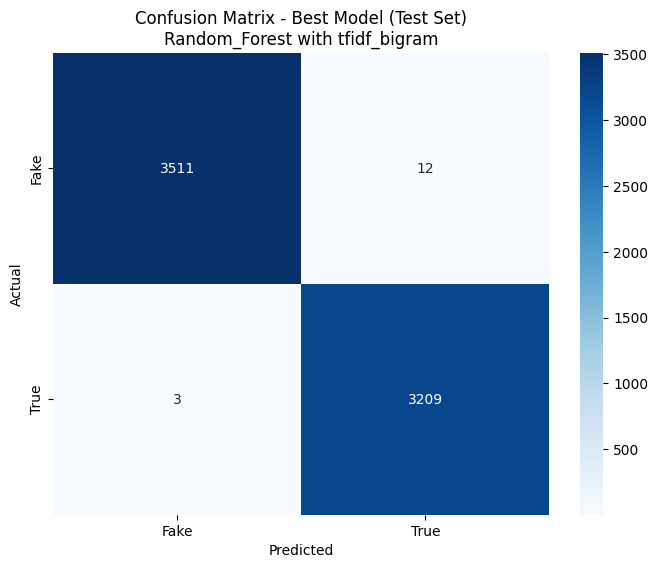


=== DETAILED METRICS FOR BEST MODEL ===
Model: Random_Forest
Feature Set: tfidf_bigram
Validation Accuracy: 0.9969
Test Accuracy: 0.9978

=== CONFUSION MATRIX BREAKDOWN ===
True Negatives (Correctly identified fake): 3511
False Positives (Fake classified as true): 12
False Negatives (True classified as fake): 3
True Positives (Correctly identified true): 3209

=== PERFORMANCE METRICS ===
Precision (Fake News Detection): 0.9991
Recall (Fake News Detection): 0.9966
F1-Score (Fake News Detection): 0.9979

Precision (True News Detection): 0.9963
Recall (True News Detection): 0.9991
F1-Score (True News Detection): 0.9977

Accuracy (verification): 0.9978

=== PERFORMANCE INTERPRETATION ===
✅ The model correctly identifies 3511 fake news articles out of 3523 fake articles
✅ The model correctly identifies 3209 true news articles out of 3212 true articles
⚠️ The model misclassifies 12 fake articles as true (False Positives)
⚠️ The model misclassifies 3 true articles as fake (False Negatives)



In [49]:
# Get best model details (based on validation performance)
best_feature = best_val_result['Feature_Set']
best_model_name = best_val_result['Model']
best_model_result = all_results[best_feature][best_model_name]

# Create confusion matrix for TEST SET
y_test_best = splits[best_feature]['y_test']
y_pred_best = best_model_result['test_predictions']  # Use test predictions

cm = confusion_matrix(y_test_best, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'True'],
            yticklabels=['Fake', 'True'])
plt.title(f'Confusion Matrix - Best Model (Test Set)\n{best_model_name} with {best_feature}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Calculate detailed metrics
tn, fp, fn, tp = cm.ravel()
precision_fake = tn / (tn + fn) if (tn + fn) > 0 else 0
recall_fake = tn / (tn + fp) if (tn + fp) > 0 else 0
precision_true = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_true = tp / (tp + fn) if (tp + fn) > 0 else 0

# F1 scores
f1_fake = 2 * (precision_fake * recall_fake) / (precision_fake + recall_fake) if (precision_fake + recall_fake) > 0 else 0
f1_true = 2 * (precision_true * recall_true) / (precision_true + recall_true) if (precision_true + recall_true) > 0 else 0

print(f"\n=== DETAILED METRICS FOR BEST MODEL ===")
print(f"Model: {best_model_name}")
print(f"Feature Set: {best_feature}")
print(f"Validation Accuracy: {best_val_result['Validation_Accuracy']:.4f}")
print(f"Test Accuracy: {best_val_result['Test_Accuracy']:.4f}")

print(f"\n=== CONFUSION MATRIX BREAKDOWN ===")
print(f"True Negatives (Correctly identified fake): {tn}")
print(f"False Positives (Fake classified as true): {fp}")
print(f"False Negatives (True classified as fake): {fn}")
print(f"True Positives (Correctly identified true): {tp}")

print(f"\n=== PERFORMANCE METRICS ===")
print(f"Precision (Fake News Detection): {precision_fake:.4f}")
print(f"Recall (Fake News Detection): {recall_fake:.4f}")
print(f"F1-Score (Fake News Detection): {f1_fake:.4f}")
print(f"")
print(f"Precision (True News Detection): {precision_true:.4f}")
print(f"Recall (True News Detection): {recall_true:.4f}")
print(f"F1-Score (True News Detection): {f1_true:.4f}")

# Overall accuracy check
total_correct = tn + tp
total_samples = tn + fp + fn + tp
accuracy_check = total_correct / total_samples
print(f"\nAccuracy (verification): {accuracy_check:.4f}")

# Performance interpretation
print(f"\n=== PERFORMANCE INTERPRETATION ===")
print(f"✅ The model correctly identifies {tn} fake news articles out of {tn + fp} fake articles")
print(f"✅ The model correctly identifies {tp} true news articles out of {fn + tp} true articles")
print(f"⚠️ The model misclassifies {fp} fake articles as true (False Positives)")
print(f"⚠️ The model misclassifies {fn} true articles as fake (False Negatives)")

# Which is worse for fake news detection?
if fp > fn:
    print(f"\n🔍 ANALYSIS: More False Positives than False Negatives")
    print(f"   This means the model is more likely to miss fake news (classify fake as true)")
    print(f"   Consider adjusting the decision threshold to be more conservative")
elif fn > fp:
    print(f"\n🔍 ANALYSIS: More False Negatives than False Positives")
    print(f"   This means the model is more likely to flag true news as fake")
    print(f"   The model is being conservative, which might be preferable for fake news detection")
else:
    print(f"\n🔍 ANALYSIS: Balanced False Positives and False Negatives")
    print(f"   The model has similar error rates for both classes")


In [50]:
print("Performing cross-validation on best model...")

best_model = all_results[best_feature][best_model_name]['model']
X_full = features[best_feature]
y_full = combined_df['label'].values

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_full, y_full, cv=5, scoring='accuracy')

print(f"\n=== CROSS-VALIDATION RESULTS ===")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Performing cross-validation on best model...

=== CROSS-VALIDATION RESULTS ===
Cross-validation scores: [0.99721604 0.99732739 0.99844098 0.99743847 0.99799532]
Mean CV accuracy: 0.9977 (+/- 0.0009)


### Save Models and Vectorizers

In [51]:
print("Saving models and vectorizers...")

# Import required libraries
import os
import pickle
import joblib

# Create directory for saved models
os.makedirs('saved_models', exist_ok=True)

# Save the best model and its vectorizer
best_vectorizer = vectorizers[best_feature]
best_model_trained = all_results[best_feature][best_model_name]['model']

# Save using pickle
with open('saved_models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model_trained, f)

with open('saved_models/best_vectorizer.pkl', 'wb') as f:
    pickle.dump(best_vectorizer, f)

# Save using joblib (alternative, often more efficient)
joblib.dump(best_model_trained, 'saved_models/best_model_joblib.pkl')
joblib.dump(best_vectorizer, 'saved_models/best_vectorizer_joblib.pkl')

# Save all models and results
all_models_data = {
    'models': all_results,
    'vectorizers': vectorizers,
    'best_config': {
        'feature_set': best_feature,
        'model_name': best_model_name,
        'validation_accuracy': best_val_result['Validation_Accuracy'],
        'test_accuracy': best_val_result['Test_Accuracy'],
        'validation_roc_auc': best_val_result['Validation_ROC_AUC'],
        'test_roc_auc': best_val_result['Test_ROC_AUC']
    },
    'results_summary': results_df,
    'split_ratios': '70% Train, 15% Validation, 15% Test'
}

with open('saved_models/complete_pipeline.pkl', 'wb') as f:
    pickle.dump(all_models_data, f)

# Save configuration file for easy loading
config_info = {
    'best_model_type': best_model_name,
    'best_feature_set': best_feature,
    'preprocessing_function': 'advanced_text_preprocessing_safe',
    'validation_accuracy': float(best_val_result['Validation_Accuracy']),
    'test_accuracy': float(best_val_result['Test_Accuracy']),
    'model_files': {
        'model_pickle': 'saved_models/best_model.pkl',
        'vectorizer_pickle': 'saved_models/best_vectorizer.pkl',
        'model_joblib': 'saved_models/best_model_joblib.pkl',
        'vectorizer_joblib': 'saved_models/best_vectorizer_joblib.pkl',
        'complete_pipeline': 'saved_models/complete_pipeline.pkl'
    }
}

import json
with open('saved_models/model_config.json', 'w') as f:
    json.dump(config_info, f, indent=2)

print("✅ Models saved successfully!")
print("Files saved:")
print("  - saved_models/best_model.pkl")
print("  - saved_models/best_vectorizer.pkl")
print("  - saved_models/best_model_joblib.pkl")
print("  - saved_models/best_vectorizer_joblib.pkl")
print("  - saved_models/complete_pipeline.pkl")
print("  - saved_models/model_config.json")

print(f"\n📊 Best Model Summary:")
print(f"Model: {best_model_name}")
print(f"Feature Set: {best_feature}")
print(f"Validation Accuracy: {best_val_result['Validation_Accuracy']:.4f}")
print(f"Test Accuracy: {best_val_result['Test_Accuracy']:.4f}")

print(f"\n💾 Model Loading Instructions:")
print("To load the saved model later:")
print("```python")
print("import pickle")
print("import joblib")
print()
print("# Option 1: Using pickle")
print("with open('saved_models/best_model.pkl', 'rb') as f:")
print("    model = pickle.load(f)")
print("with open('saved_models/best_vectorizer.pkl', 'rb') as f:")
print("    vectorizer = pickle.load(f)")
print()
print("# Option 2: Using joblib (recommended)")
print("model = joblib.load('saved_models/best_model_joblib.pkl')")
print("vectorizer = joblib.load('saved_models/best_vectorizer_joblib.pkl')")
print("```")

Saving models and vectorizers...
✅ Models saved successfully!
Files saved:
  - saved_models/best_model.pkl
  - saved_models/best_vectorizer.pkl
  - saved_models/best_model_joblib.pkl
  - saved_models/best_vectorizer_joblib.pkl
  - saved_models/complete_pipeline.pkl
  - saved_models/model_config.json

📊 Best Model Summary:
Model: Random_Forest
Feature Set: tfidf_bigram
Validation Accuracy: 0.9969
Test Accuracy: 0.9978

💾 Model Loading Instructions:
To load the saved model later:
```python
import pickle
import joblib

# Option 1: Using pickle
with open('saved_models/best_model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('saved_models/best_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Option 2: Using joblib (recommended)
model = joblib.load('saved_models/best_model_joblib.pkl')
vectorizer = joblib.load('saved_models/best_vectorizer_joblib.pkl')
```


### Create Prediction Function

In [52]:
def predict_news(text, model_path='saved_models/best_model.pkl',
                 vectorizer_path='saved_models/best_vectorizer.pkl'):
    """
    Predict if a news article is fake or real

    Args:
        text (str): News article text
        model_path (str): Path to saved model
        vectorizer_path (str): Path to saved vectorizer

    Returns:
        dict: Prediction results
    """
    # Load model and vectorizer
    with open(model_path, 'rb') as f:
        model = pickle.load(f)

    with open(vectorizer_path, 'rb') as f:
        vectorizer = pickle.load(f)

    # Preprocess text
    processed_text = advanced_text_preprocessing(text)

    # Vectorize
    text_vector = vectorizer.transform([processed_text])

    # Predict
    prediction = model.predict(text_vector)[0]
    probability = model.predict_proba(text_vector)[0]

    # Format results
    label = "TRUE" if prediction == 1 else "FAKE"
    confidence = max(probability)

    return {
        'prediction': label,
        'confidence': confidence,
        'probability_fake': probability[0],
        'probability_true': probability[1]
    }

# Test the prediction function
sample_text = """
Scientists at MIT have discovered a revolutionary new technology that can convert
thoughts directly into text. This breakthrough could help people with disabilities
communicate more effectively. The research was published in Nature journal.
"""

result = predict_news(sample_text)
print("\n=== PREDICTION TEST ===")
print(f"Sample text: {sample_text[:100]}...")
print(f"Prediction: {result['prediction']}")
print(f"Confidence: {result['confidence']:.4f}")
print(f"Probability of being fake: {result['probability_fake']:.4f}")
print(f"Probability of being true: {result['probability_true']:.4f}")

print("\n✅ Prediction function created and tested!")


=== PREDICTION TEST ===
Sample text: 
Scientists at MIT have discovered a revolutionary new technology that can convert
thoughts directly...
Prediction: FAKE
Confidence: 1.0000
Probability of being fake: 1.0000
Probability of being true: 0.0000

✅ Prediction function created and tested!


### Model Loading Test

In [53]:
print("Testing model loading...")

# Test loading with pickle
try:
    with open('saved_models/best_model.pkl', 'rb') as f:
        loaded_model = pickle.load(f)

    with open('saved_models/best_vectorizer.pkl', 'rb') as f:
        loaded_vectorizer = pickle.load(f)

    print("✅ Pickle loading successful!")

except Exception as e:
    print(f"❌ Pickle loading failed: {e}")

# Test loading with joblib
try:
    loaded_model_joblib = joblib.load('saved_models/best_model_joblib.pkl')
    loaded_vectorizer_joblib = joblib.load('saved_models/best_vectorizer_joblib.pkl')

    print("✅ Joblib loading successful!")

except Exception as e:
    print(f"❌ Joblib loading failed: {e}")

# Test prediction with loaded model
test_sample = "Breaking news: New study shows amazing results!"
processed_sample = advanced_text_preprocessing(test_sample)
vector_sample = loaded_vectorizer.transform([processed_sample])
prediction_sample = loaded_model.predict(vector_sample)

print(f"\nTest prediction with loaded model:")
print(f"Text: {test_sample}")
print(f"Prediction: {'TRUE' if prediction_sample[0] == 1 else 'FAKE'}")

print("\n✅ All tests completed successfully!")


Testing model loading...
✅ Pickle loading successful!
✅ Joblib loading successful!

Test prediction with loaded model:
Text: Breaking news: New study shows amazing results!
Prediction: FAKE

✅ All tests completed successfully!
